In [1]:
import numpy as np
import matplotlib.pyplot as plt

cases_data = np.genfromtxt("cases_comparation.csv", delimiter = ',', skip_header = 1)[:, 1:] / 1000000
cases = ['GEMASOLAR', 'Base Case', 'Evaporative Cooling', 'Dry Cooling', 'Once Through Cooling', 'MED Cooling']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Agu', 'Sep', 'Oct', 'Nov', 'Dec']
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize= 16)

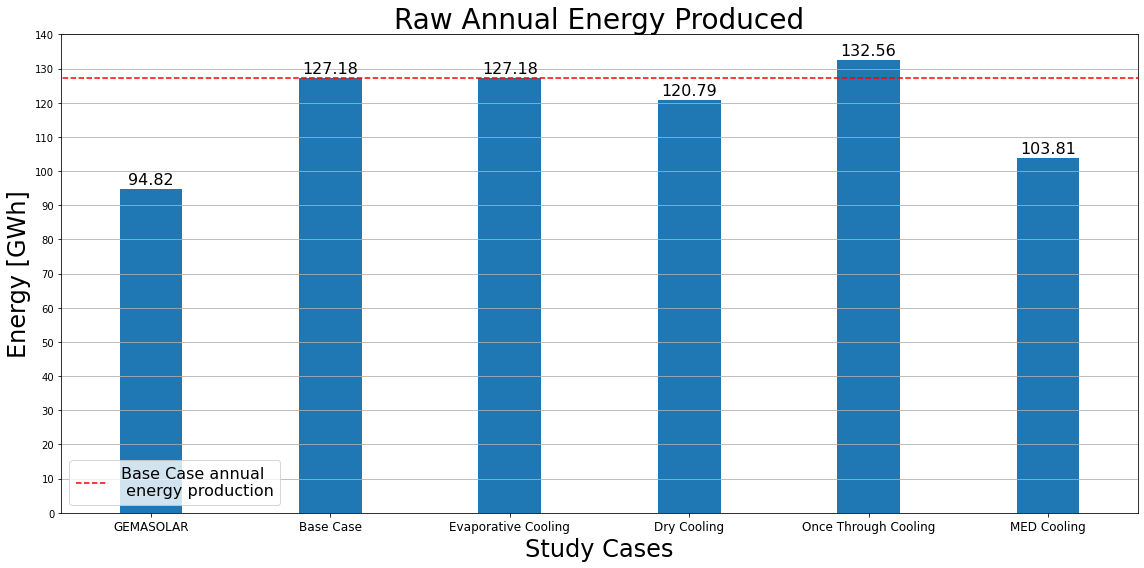

In [10]:
annual_gen = [94.82, 127.18, 127.18, 120.79, 132.56, 103.81]

x = np.arange(len(cases))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x, annual_gen, width)
ax.plot([-1, 8], [annual_gen[1], annual_gen[1]], 'r--',
        label= 'Base Case annual \n energy production'
        )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy [GWh]', fontsize= 24)
ax.set_xlabel('Study Cases', fontsize= 24)
ax.set_title('Raw Annual Energy Produced', fontsize= 28)
ax.set_xticks(x)
ax.set_yticks(np.arange(0, 150, 10))
ax.set_ylim(0, 140)
ax.set_xlim(-0.5, 5.5)
ax.set_xticklabels(cases, fontsize= 12)
ax.legend(loc='lower left', fontsize= 16)
ax.grid(axis= 'y')

autolabel(rects1)

fig.tight_layout()
plt.savefig('annual_energy_comparison.png', format='png', bbox_inches='tight')
plt.show()

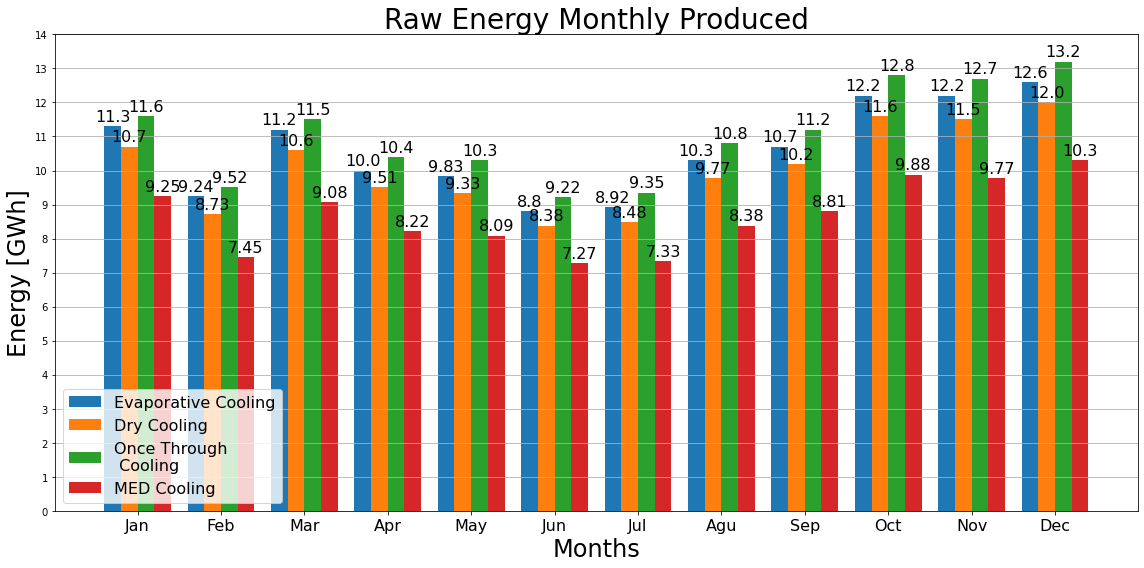

In [3]:
## ONLY CHILE CASES W BASE CASE##
x = np.arange(len(months))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
#gemasolar = ax.bar(x - 2*width, cases_data[:, 0], width, label='Gemasolar')
case_base = ax.bar(x - 3*width/2, cases_data[:, 1], width,
                   label='Evaporative Cooling')
case_a = ax.bar(x - width/2, cases_data[:, 2], width,
                label='Dry Cooling')
case_b = ax.bar(x + width/2, cases_data[:, 3], width,
                label='Once Through\n Cooling')
case_c = ax.bar(x + 3*width/2, cases_data[:, 4], width,
                label='MED Cooling')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy [GWh]', fontsize= 24)
ax.set_xlabel('Months', fontsize= 24)
ax.set_title('Raw Energy Monthly Produced', fontsize= 28)
ax.set_xticks(x)
ax.set_yticks(np.arange(0, 15, 1))
ax.set_ylim(0, 14)
ax.set_xticklabels(months, fontsize= 16)
ax.legend(loc='lower left', fontsize= 16)
ax.grid(axis= 'y')

#autolabel(gemasolar)
autolabel(case_base)
autolabel(case_a)
autolabel(case_b)
autolabel(case_c)

fig.tight_layout()
plt.savefig('cases_comparison_w_basecase.png', format='png', bbox_inches='tight')
plt.show()

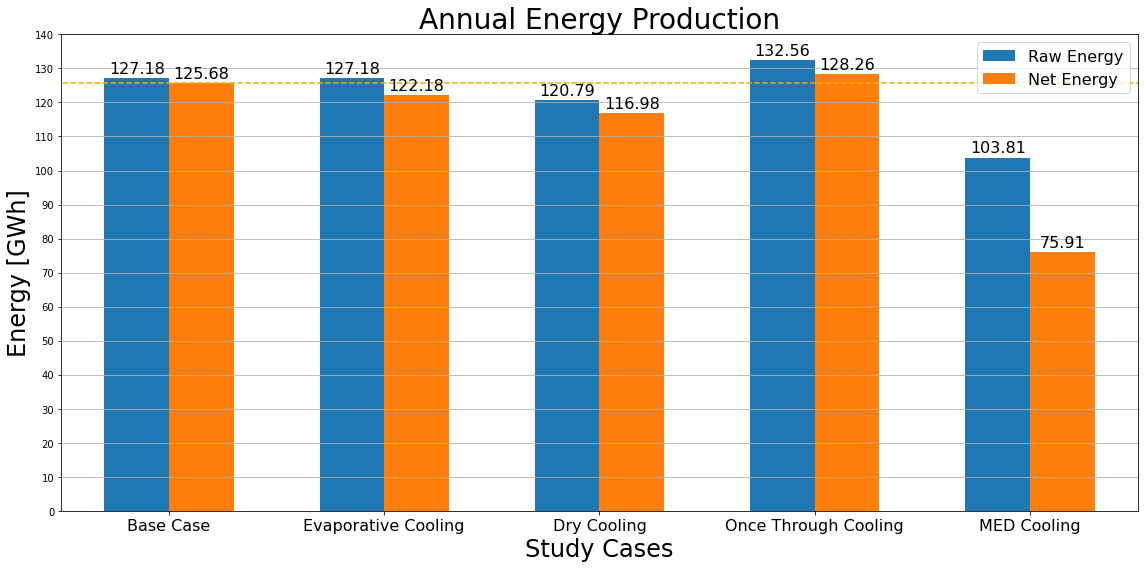

In [4]:
annual_gen = [127.18, 127.18, 120.79, 132.56, 103.81]
annual_netgen = [127.18 - 1.5, 127.18 - 5, 120.79 - 3.81, 132.56 - 4.3, 103.81 - 27.9]

x = np.arange(len(cases[1:]))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width/2, annual_gen, width, label= 'Raw Energy')
rects2 = ax.bar(x + width/2, annual_netgen, width, label= 'Net Energy')
ax.plot([-1, 8], [annual_netgen[0], annual_netgen[0]], color='orange', linestyle= '--'
        )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy [GWh]', fontsize= 24)
ax.set_xlabel('Study Cases', fontsize= 24)
ax.set_title('Annual Energy Production', fontsize= 28)
ax.set_xticks(x)
ax.set_yticks(np.arange(0, 150, 10))
ax.set_ylim(0, 140)
ax.set_xlim(-0.5, 4.5)
ax.set_xticklabels(cases[1:], fontsize= 16)
ax.grid(axis= 'y')
ax.legend(fontsize= 16)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('annual_energy_parasitic.png', format='png', bbox_inches='tight')
plt.show()

## Water use

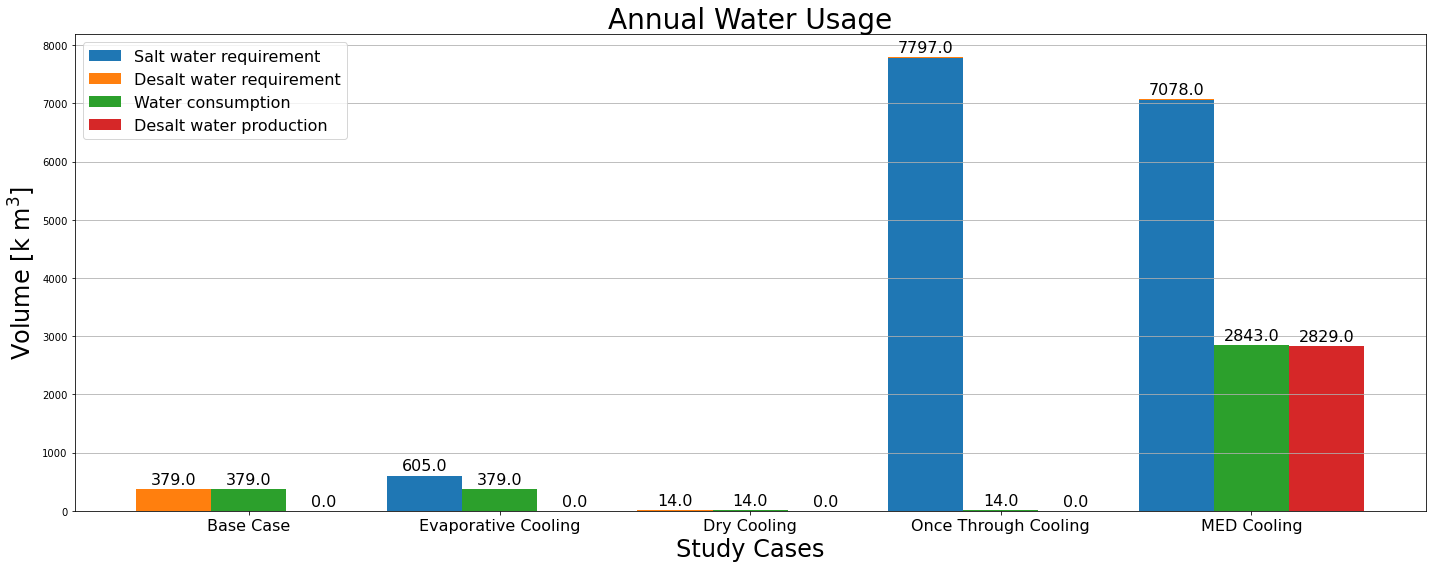

In [11]:
r_desalt_water = np.round(np.array([365181 + 14004, 14004, 14005, 14004, 13811])/1000,0)
r_salt_water = np.round(np.array([0, 591300, 0, 7782518, 7064064])/1000,0)
r_total_water= r_desalt_water + r_salt_water
consumed_water = np.round(np.array([379185, 379185, 14005,14004,2842590])/1000,0)
produced_water = np.round(np.array([0, 0, 0, 0, 2828779])/1000,0)

x = np.arange(len(cases[1:]))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 8))
rects0 = ax.bar(x - width, r_total_water, width, color= 'black')
rects1 = ax.bar(x - width, r_salt_water, width, label= 'Salt water requirement')
rects2 = ax.bar(x - width, r_desalt_water, width, bottom= r_salt_water, label= 'Desalt water requirement')
rects3 = ax.bar(x, consumed_water, width, label= 'Water consumption')
rects4 = ax.bar(x + width, produced_water, width, label= 'Desalt water production')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Volume [k m$^3$]', fontsize= 24)
ax.set_xlabel('Study Cases', fontsize= 24)
ax.set_title('Annual Water Usage', fontsize= 28)
ax.set_xticks(x)
#ax.set_yticks(np.arange(0, 150, 10))
#ax.set_ylim(0, 140)
ax.set_xticklabels(cases[1:], fontsize= 16)
ax.grid(axis= 'y')
ax.legend(fontsize= 16)

autolabel(rects0)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.savefig('annual_water_use.png', format='png', bbox_inches='tight')
plt.show()

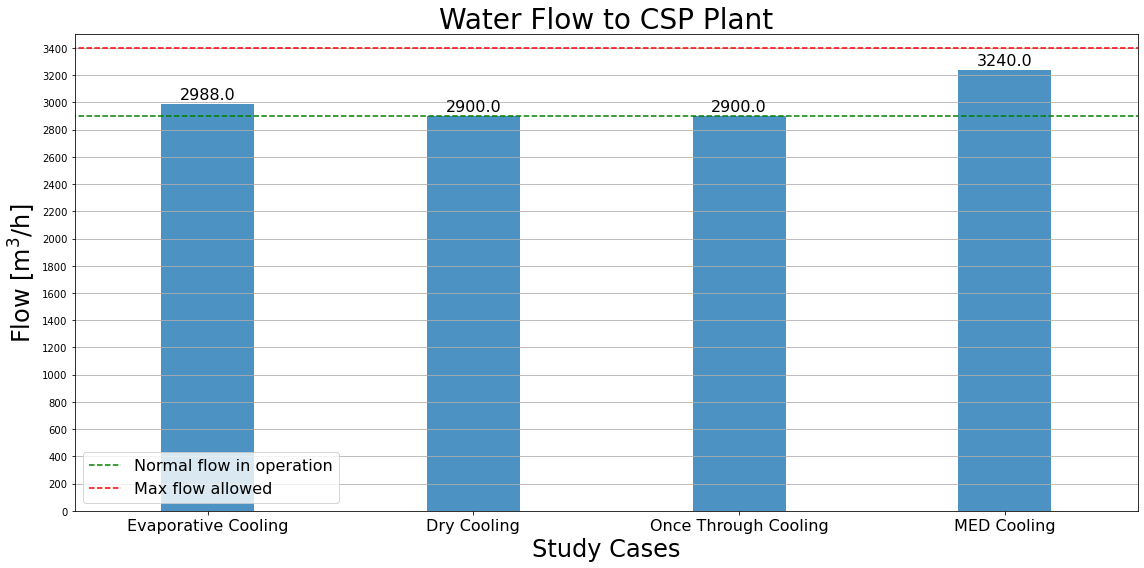

In [6]:
water_transported = np.array([.83*3600, 2900, 2900, .9*3600])

x = np.arange(len(cases[2:]))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x, water_transported, width, alpha= .8)
ax.plot([-1, 8], [2900, 2900], 'g--',
        label= 'Normal flow in operation'
        )
ax.plot([-1, 8], [3400, 3400], 'r--',
        label= 'Max flow allowed'
        )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Flow [m$^3$/h]', fontsize= 24)
ax.set_xlabel('Study Cases', fontsize= 24)
ax.set_title('Water Flow to CSP Plant', fontsize= 28)
ax.set_xticks(x)
ax.set_xlim(-0.5, 3.5)
ax.set_yticks(np.arange(0, 3600, 200))
ax.set_ylim(0, 3500)
ax.set_xticklabels(cases[2:], fontsize= 16)
ax.legend(loc= 'lower left',fontsize= 16)
ax.grid(axis= 'y')

autolabel(rects1)

fig.tight_layout()
plt.savefig('water_flow_comparison.png', format='png', bbox_inches='tight')
plt.show()

In [7]:
# Economic comparison

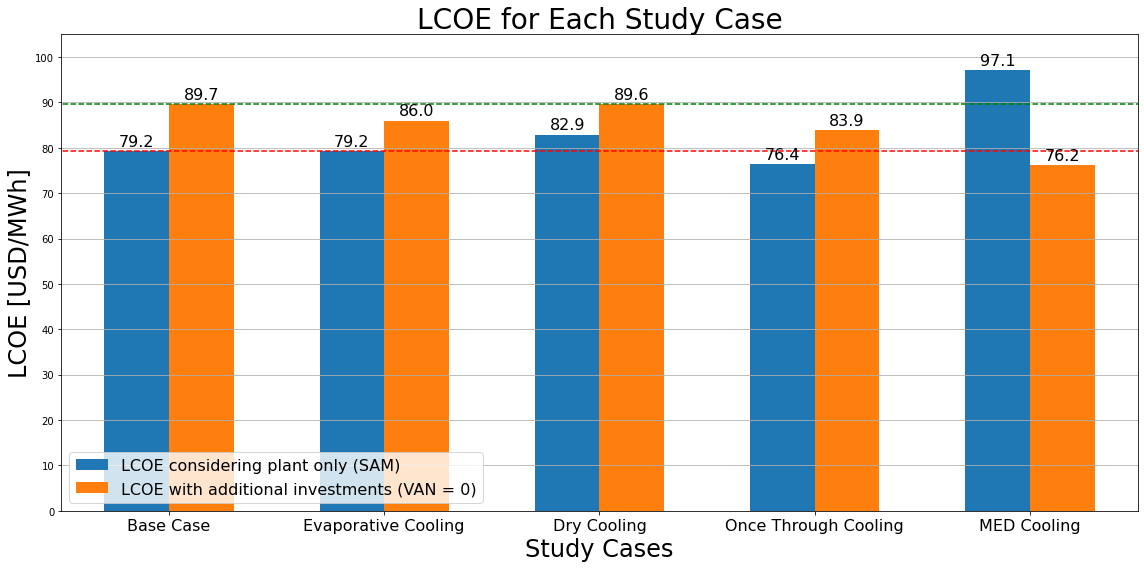

In [2]:
lcoe = [79.2, 79.2, 82.9, 76.4, 97.1]
lcoe_real = [89.7, 86.0, 89.6, 83.9, 76.2]

x = np.arange(len(cases[1:]))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width/2, lcoe, width, label= 'LCOE considering plant only (SAM)')
rects2 = ax.bar(x + width/2, lcoe_real, width, label= 'LCOE with additional investments (VAN = 0)')
ax.plot([-1, 8], [lcoe[0], lcoe[0]], 'r--')
ax.plot([-1, 8], [lcoe_real[0], lcoe_real[0]], 'g--')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('LCOE [USD/MWh]', fontsize= 24)
ax.set_xlabel('Study Cases', fontsize= 24)
ax.set_title('LCOE for Each Study Case', fontsize= 28)
ax.set_xticks(x)
ax.set_xlim(-0.5, 4.5)
ax.set_yticks(np.arange(0, 105, 10))
ax.set_ylim(0, 105)
ax.set_xticklabels(cases[1:], fontsize= 16)
ax.grid(axis= 'y')
ax.legend(loc= 'lower left', fontsize= 16)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('lcoe_cases.png', format='png', bbox_inches='tight')
plt.show()

In [ ]:
#Sensitivity Analysis


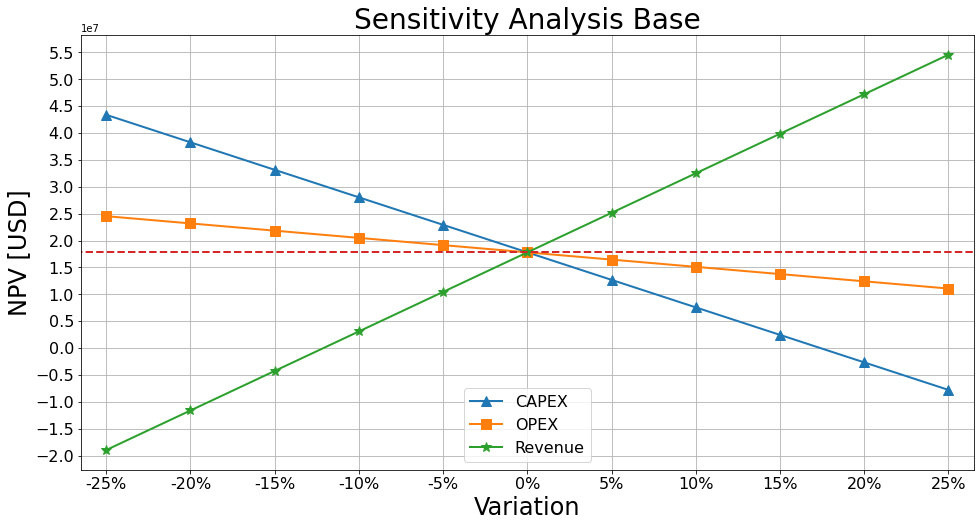

In [13]:
#BASE
#Variation
var = ['-25%', '-20%', '-15%', '-10%', '-5%', '0%', '5%', '10%', '15%', '20%', '25%']
capex = [43396326, 38278343, 33160360, 28042376, 22924393, 17806410, 12688427, 7570444, 2452461, -2665522, -7783505]
opex = [24538707, 23192247, 21845788, 20499329, 19152870, 17806410, 16459951, 15113492, 13767033, 12420573, 11074114]
revenue = [-18967404, -11612641, -4257878, 3096885, 10451648, 17806410, 25161173, 32515936, 39870699, 47225462, 54580224]
#energy = [-17690497, -10591115, -3491734, 3607648, 10707029, 17806410, 24905792, 32005173, 39104555, 46203936, 53303318]

#Graph
plt.figure(figsize=(16, 8)) #Image Size
plt.plot(var, capex, ls= '-', lw= 2, marker= '^', ms= 10, label= 'CAPEX')
plt.plot(var, opex, ls= '-', lw= 2, marker= 's', ms= 10, label= 'OPEX')
plt.plot(var, revenue, ls= '-', lw= 2, marker= '*', ms= 10, label= 'Revenue')
#plt.plot(var, energy, ls= '-', lw= 2, marker= 'o', ms= 10, label= 'Energy')
plt.plot([-1, 11], [17806410, 17806410], ls= '--', lw= 2)
plt.yticks(np.arange(-20000000, 60000000, 5000000), fontsize= 16)
plt.xticks(fontsize= 16)
plt.xlabel(r'Variation', fontsize=24)
plt.ylabel(r'NPV [USD]', fontsize=24)
plt.title("Sensitivity Analysis Base", fontsize=28)
plt.xlim(-.3, 10.3)
plt.legend(fontsize= 16)
plt.grid()

#Save figure
plt.savefig('van_base.png', format='png', bbox_inches='tight')
plt.show()

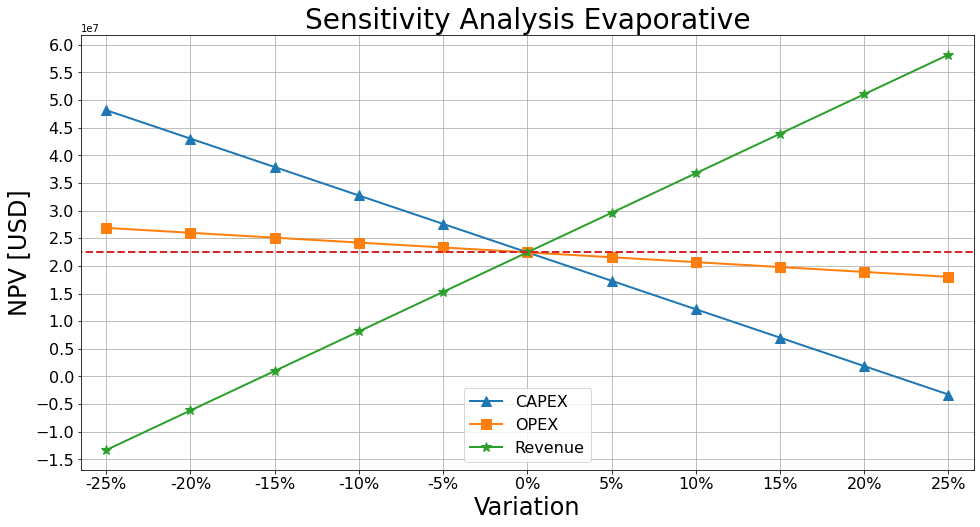

In [9]:
#EVAPORATIVE
#Variation
var = ['-25%', '-20%', '-15%', '-10%', '-5%', '0%', '5%', '10%', '15%', '20%', '25%']
capex = [48154250,43011523, 37868796, 32726069, 27583342, 22440615, 17297888, 12155161, 7012434, 1869707, -3273020]
opex = [26866545, 25981359, 25096173, 24210987, 23325801, 22440615, 21555430, 20670244, 19785058, 18899872, 18014686]
revenue = [-13309103, -6159159, 990784, 8140728, 15290672, 22440615, 29590559, 36740503, 43890446, 51040390, 58190334]
#energy = [-12032196, -5137634, 1756928, 8651491, 15546053, 22440615, 29335178, 36229740, 43124302, 50018865, 56913427]

#Graph
plt.figure(figsize=(16, 8)) #Image Size
plt.plot(var, capex, ls= '-', lw= 2, marker= '^', ms= 10, label= 'CAPEX')
plt.plot(var, opex, ls= '-', lw= 2, marker= 's', ms= 10, label= 'OPEX')
plt.plot(var, revenue, ls= '-', lw= 2, marker= '*', ms= 10, label= 'Revenue')
#plt.plot(var, energy, ls= '-', lw= 2, marker= 'o', ms= 10, label= 'Energy')
plt.plot([-1, 11], [22440615, 22440615], ls= '--', lw= 2)
plt.yticks(np.arange(-15000000, 65000000, 5000000), fontsize= 16)
plt.xticks(fontsize= 16)
plt.xlabel(r'Variation', fontsize=24)
plt.ylabel(r'NPV [USD]', fontsize=24)
plt.title("Sensitivity Analysis Evaporative", fontsize=28)
plt.xlim(-.3, 10.3)
plt.legend(fontsize= 16)
plt.grid()

#Save figure
plt.savefig('van_evap.png', format='png', bbox_inches='tight')
plt.show()

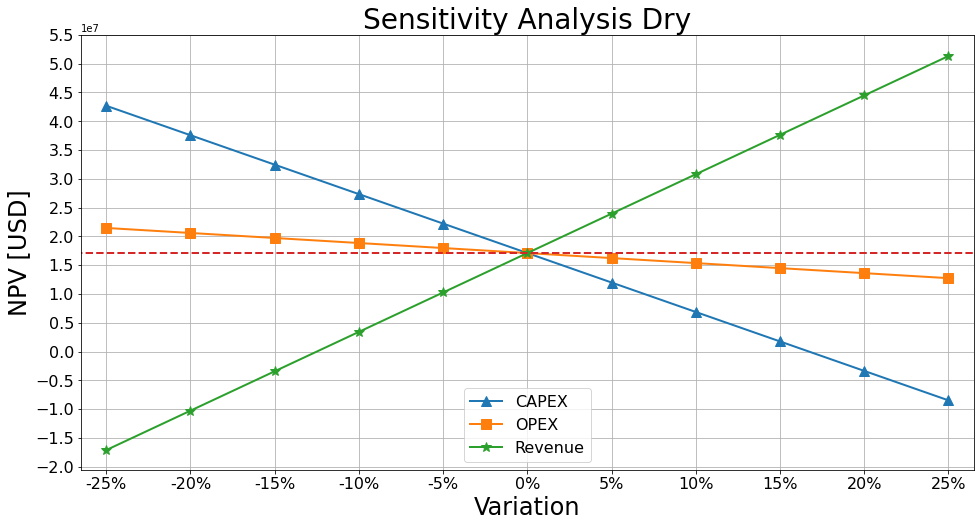

In [10]:
#DRY
#Variation
var = ['-25%', '-20%', '-15%', '-10%', '-5%', '0%', '5%', '10%', '15%', '20%', '25%']
capex = [42695982, 37577999, 32460016, 27342033, 22224050, 17106067, 11988084, 6870101, 1752118, -3365865, -8483849]
opex = [21467839, 20595485, 19723130, 18850776, 17978421, 17106067, 16233712, 15361358, 14489003, 13616648, 12744294]
revenue = [-17122138, -10276497, -3430856, 3414785, 10260426, 17106067, 23951708, 30797349, 37642989, 44488630, 51334271]
#energy = [-15909388, -9306297, -2703206, 3899885, 10502976, 17106067, 23709158, 30312248, 36915339, 43518430, 50121521]

#Graph
plt.figure(figsize=(16, 8)) #Image Size
plt.plot(var, capex, ls= '-', lw= 2, marker= '^', ms= 10, label= 'CAPEX')
plt.plot(var, opex, ls= '-', lw= 2, marker= 's', ms= 10, label= 'OPEX')
plt.plot(var, revenue, ls= '-', lw= 2, marker= '*', ms= 10, label= 'Revenue')
#plt.plot(var, energy, ls= '-', lw= 2, marker= 'o', ms= 10, label= 'Energy')
plt.plot([-1, 11], [17106067, 17106067], ls= '--', lw= 2)
plt.yticks(np.arange(-20000000, 60000000, 5000000), fontsize= 16)
plt.xticks(fontsize= 16)
plt.xlabel(r'Variation', fontsize=24)
plt.ylabel(r'NPV [USD]', fontsize=24)
plt.title("Sensitivity Analysis Dry", fontsize=28)
plt.xlim(-.3, 10.3)
plt.legend(fontsize= 16)
plt.grid()

#Save figure
plt.savefig('van_dry.png', format='png', bbox_inches='tight')
plt.show()

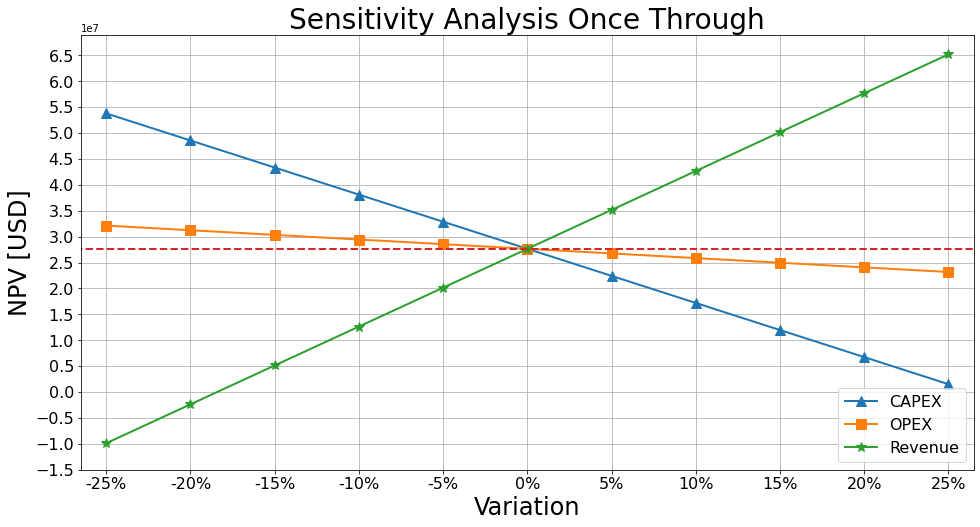

In [12]:
#ONCE THROUGH
#Variation
var = ['-25%', '-20%', '-15%', '-10%', '-5%', '0%', '5%', '10%', '15%', '20%', '25%']
capex = [53791084, 48564150, 43337216, 38110282, 32883348, 27656414, 22429480, 17202546, 11975612, 6748678, 1521744]
opex = [32136359, 31240370, 30344381, 29448392, 28552403, 27656414, 26760425, 25864436, 24968447, 24072458, 23176468]
revenue = [-9872305, -2366561, 5139183, 12644926, 20150670, 27656414, 35162158, 42667901, 50173645, 57679389, 65185133]
#energy = [-8541382, -1301823, 5937736, 13177295, 20416855, 27656414, 34895973, 42135532, 49375091, 56614651, 63854210]

#Graph
plt.figure(figsize=(16, 8)) #Image Size
plt.plot(var, capex, ls= '-', lw= 2, marker= '^', ms= 10, label= 'CAPEX')
plt.plot(var, opex, ls= '-', lw= 2, marker= 's', ms= 10, label= 'OPEX')
plt.plot(var, revenue, ls= '-', lw= 2, marker= '*', ms= 10, label= 'Revenue')
#plt.plot(var, energy, ls= '-', lw= 2, marker= 'o', ms= 10, label= 'Energy')
plt.plot([-1, 11], [27656414, 27656414], ls= '--', lw= 2)
plt.yticks(np.arange(-15000000, 70000000, 5000000), fontsize= 16)
plt.xticks(fontsize= 16)
plt.xlabel(r'Variation', fontsize=24)
plt.ylabel(r'NPV [USD]', fontsize=24)
plt.title("Sensitivity Analysis Once Through", fontsize=28)
plt.xlim(-.3, 10.3)
plt.legend(fontsize= 16)
plt.grid()

#Save figure
plt.savefig('van_ot.png', format='png', bbox_inches='tight')
plt.show()

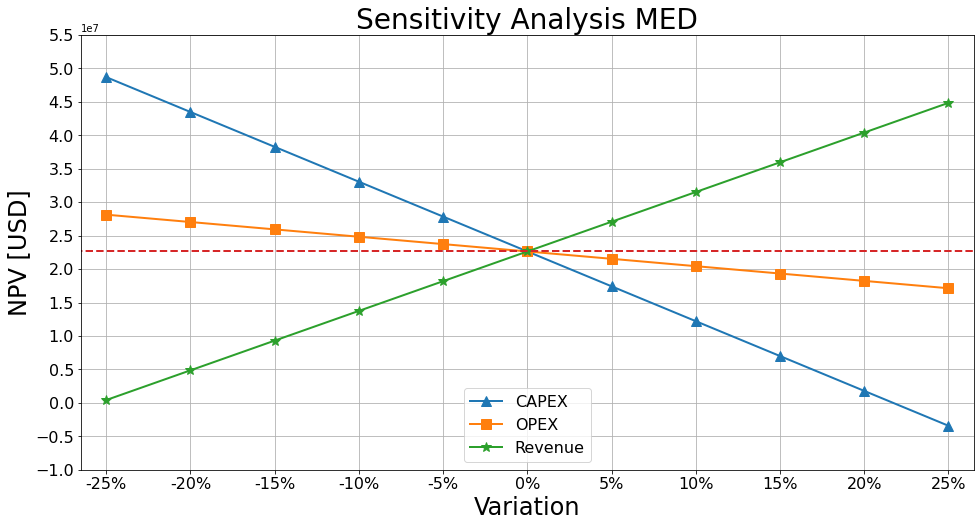

In [2]:
#MED Energy
#Variation
var = ['-25%', '-20%', '-15%', '-10%', '-5%', '0%', '5%', '10%', '15%', '20%', '25%']
capex = [48690321, 43479318, 38268315, 33057312, 27846309, 22635306, 17424303, 12213300, 7002297, 1791294, -3419708]
opex = [28134686, 27034810, 25934934, 24835058, 23735182, 22635306, 21535430, 20435554, 19335678, 18235803, 17135927]
revenue = [424133, 4866368, 9308602, 13750837, 18193072, 22635306, 27077541, 31519775, 35962010, 40404245, 44846479]
#energy = [5923513, 9265872, 12608230, 15950589, 19292948, 22635306, 25977665, 29320024, 32662382, 36004741, 39347100]

#Graph
plt.figure(figsize=(16, 8)) #Image Size
plt.plot(var, capex, ls= '-', lw= 2, marker= '^', ms= 10, label= 'CAPEX')
plt.plot(var, opex, ls= '-', lw= 2, marker= 's', ms= 10, label= 'OPEX')
plt.plot(var, revenue, ls= '-', lw= 2, marker= '*', ms= 10, label= 'Revenue')
#plt.plot(var, energy, ls= '-', lw= 2, marker= 'o', ms= 10, label= 'Energy')
plt.plot([-1, 11], [22635306, 22635306], ls= '--', lw= 2)
plt.yticks(np.arange(-10000000, 60000000, 5000000), fontsize= 16)
plt.xticks(fontsize= 16)
plt.xlabel(r'Variation', fontsize=24)
plt.ylabel(r'NPV [USD]', fontsize=24)
plt.title("Sensitivity Analysis MED", fontsize=28)
plt.xlim(-.3, 10.3)
plt.legend(fontsize= 16)
plt.grid()

#Save figure
plt.savefig('van_med.png', format='png', bbox_inches='tight')
plt.show()

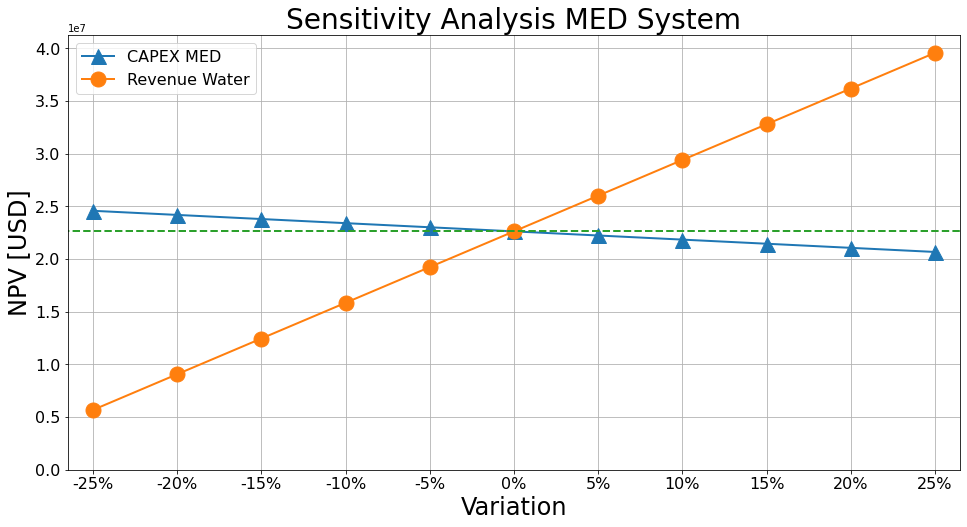

In [3]:
#MED Water
#Variation
var = ['-25%', '-20%', '-15%', '-10%', '-5%', '0%', '5%', '10%', '15%', '20%', '25%']
capex_med = [24589644, 24198777, 23807909, 23417041, 23026174, 22635306, 22244439, 21853571, 21462703, 21071836, 20680968]
revenue_water = [5678920, 9070198, 12461475, 15852752, 19244029, 22635306, 26026583, 29417861, 32809138, 36200415, 39591692]

#Graph
plt.figure(figsize=(16, 8)) #Image Size
plt.plot(var, capex_med, ls= '-', lw= 2, marker= '^', ms= 15, label= 'CAPEX MED')
plt.plot(var, revenue_water, ls= '-', lw= 2, marker= 'o', ms= 15, label= 'Revenue Water')
plt.plot([-1, 11], [22635306, 22635306], ls= '--', lw= 2)
plt.yticks(np.arange(0, 45000000, 5000000), fontsize= 16)
plt.xticks(fontsize= 16)
plt.xlabel(r'Variation', fontsize=24)
plt.ylabel(r'NPV [USD]', fontsize=24)
plt.title("Sensitivity Analysis MED System", fontsize=28)
plt.xlim(-.3, 10.3)
plt.legend(fontsize= 16)
plt.grid()

#Save figure
plt.savefig('van_med_water.png', format='png', bbox_inches='tight')
plt.show()